In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def pre_process(data):
    # Remove the patient layer
    new_data = {}
    for patient, patient_data in data.items():
        for document_name, document_data in patient_data.items():
            new_key = f"{patient}:{document_name}"
            new_data[new_key] = document_data
    # Flatten the nested dictionary
    pd_data = []
    for document, models in new_data.items():
        for model, questions in models.items():
            for question, metrics in questions.items():
                row = {"Document": document, "Model": model, "Question": question}
                row.update(metrics)
                pd_data.append(row)
    return pd.DataFrame(pd_data)


# Load the JSON file
with open("evaluation_results.json") as f:
    data = json.load(f)

# Pre-process the data
df = pre_process(data)
print(df.head())
print(df.info())

                               Document  Model  Question  nli_score  lcs_score
0  fake_patient1:fake_patient1_doc1_RAD  gpt-4      name   0.161652   1.000000
1  fake_patient1:fake_patient1_doc1_RAD  gpt-4      type   0.942460   1.000000
2  fake_patient1:fake_patient1_doc1_RAD  gpt-4      date   0.903287   0.892857
3  fake_patient1:fake_patient1_doc1_RAD  gpt-4   episode   0.037957   0.857143
4  fake_patient1:fake_patient1_doc1_RAD  gpt-4  sections   0.971453   1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Document   3717 non-null   object 
 1   Model      3717 non-null   object 
 2   Question   3717 non-null   object 
 3   nli_score  3717 non-null   float64
 4   lcs_score  3717 non-null   float64
dtypes: float64(2), object(3)
memory usage: 145.3+ KB
None


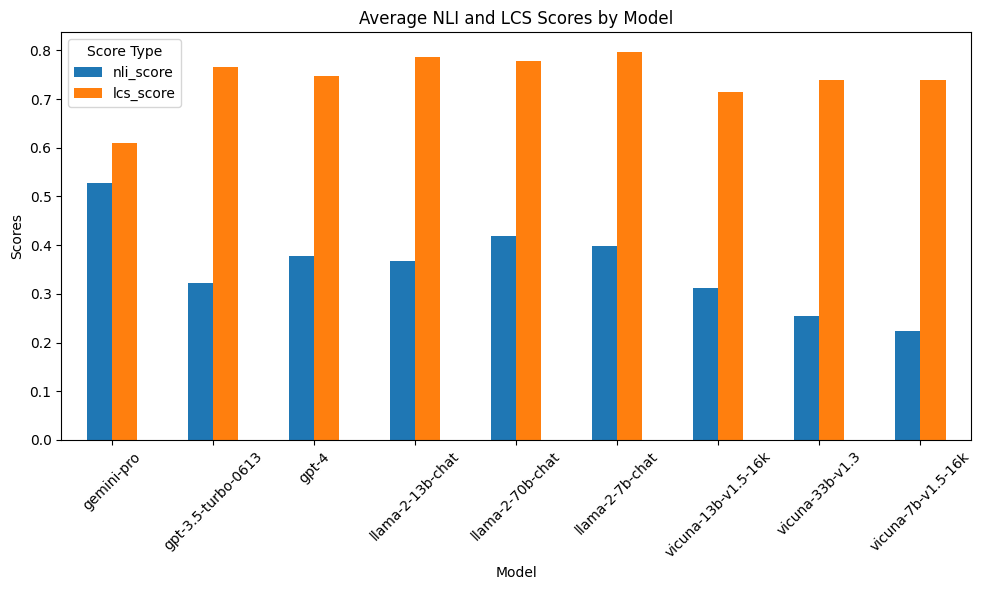

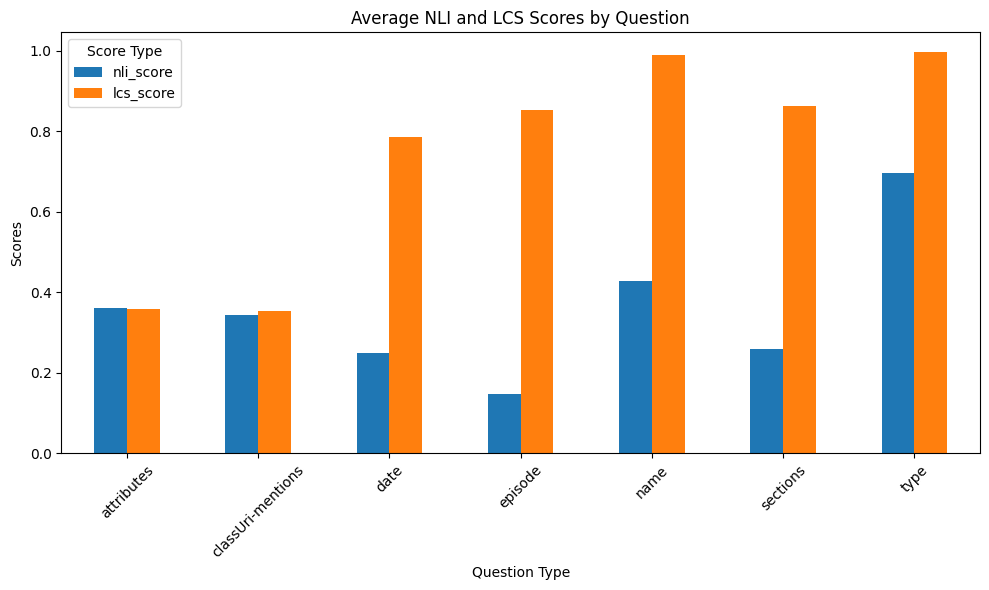

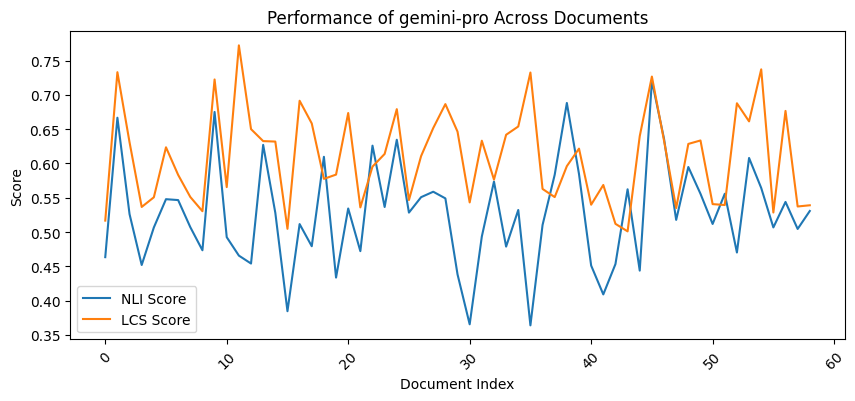

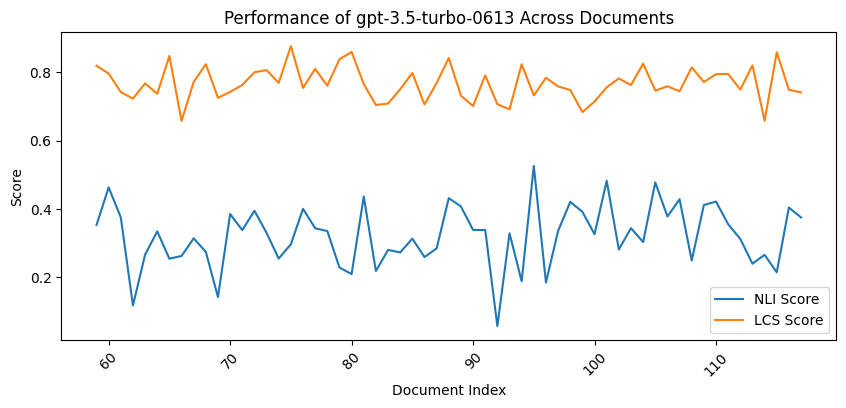

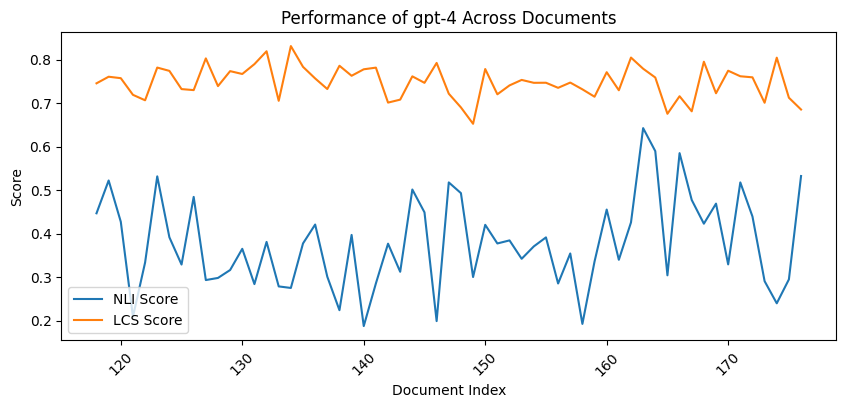

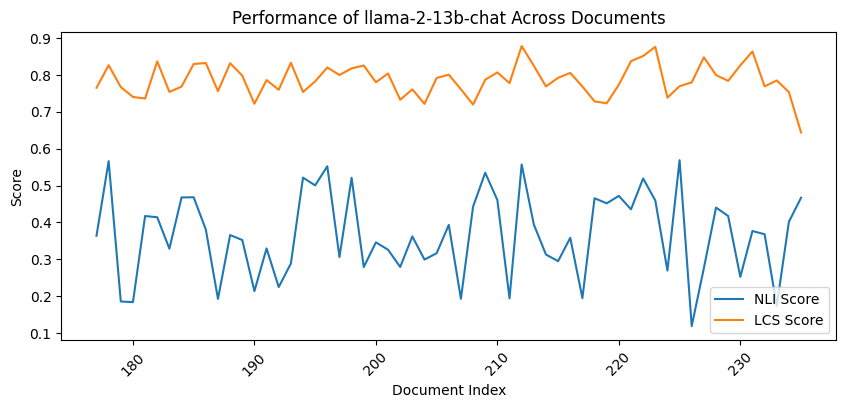

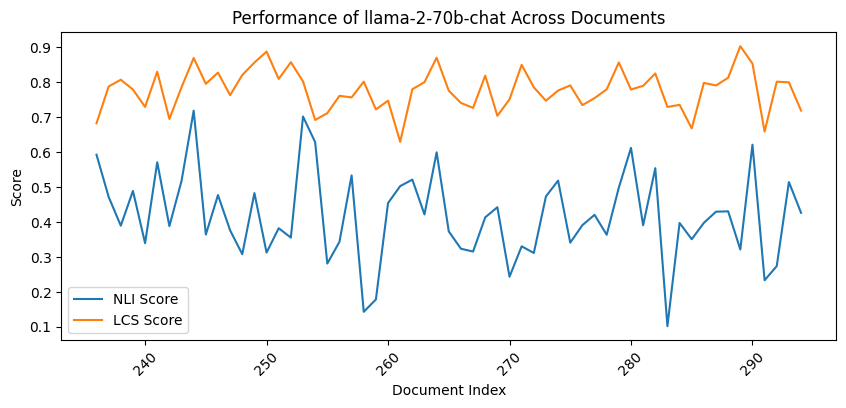

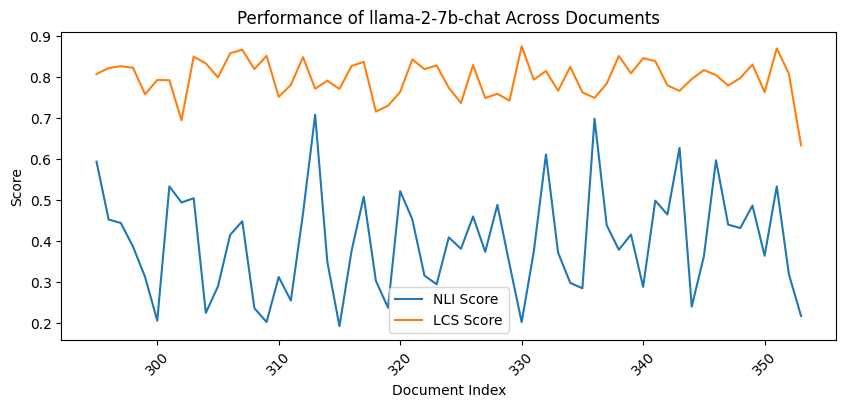

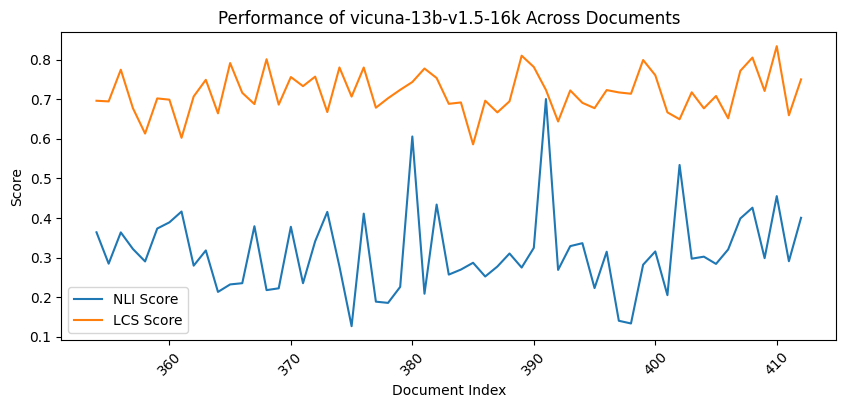

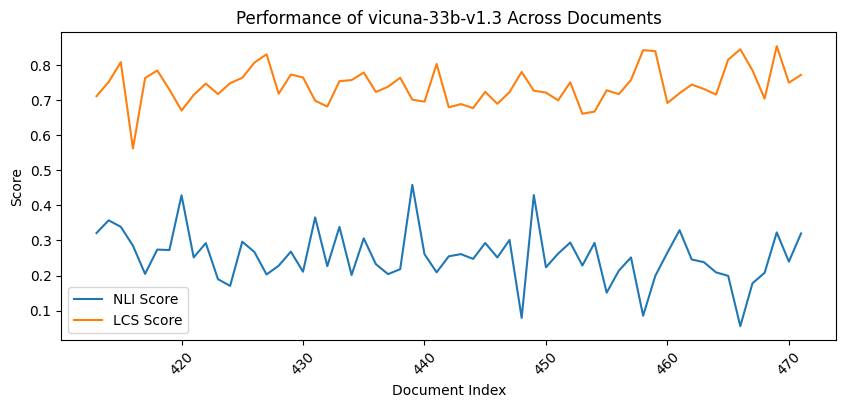

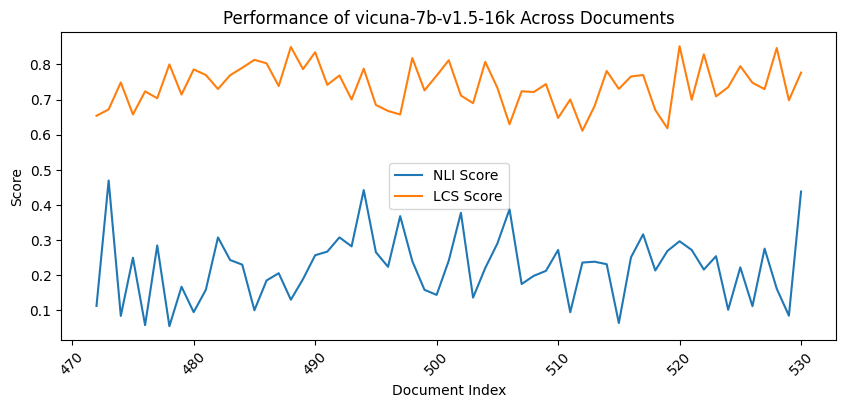

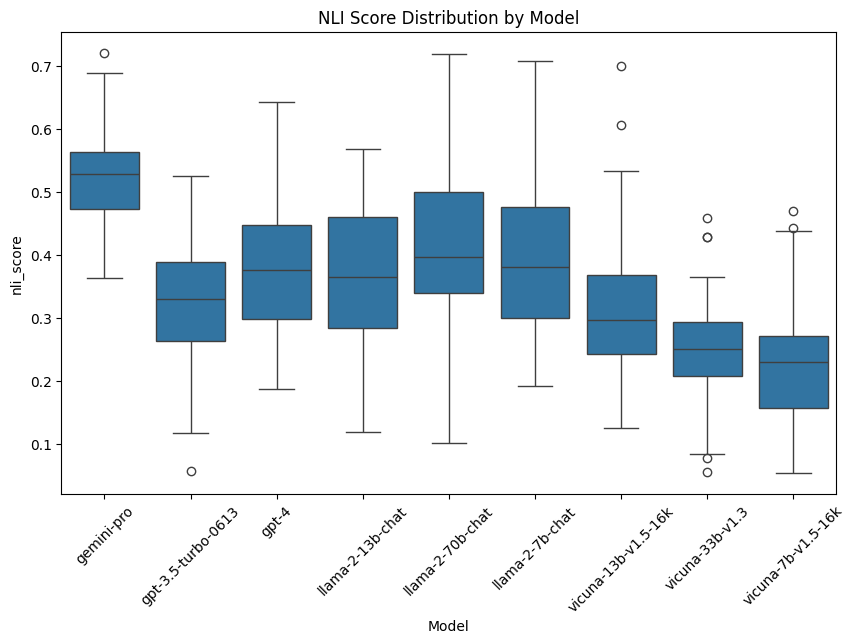

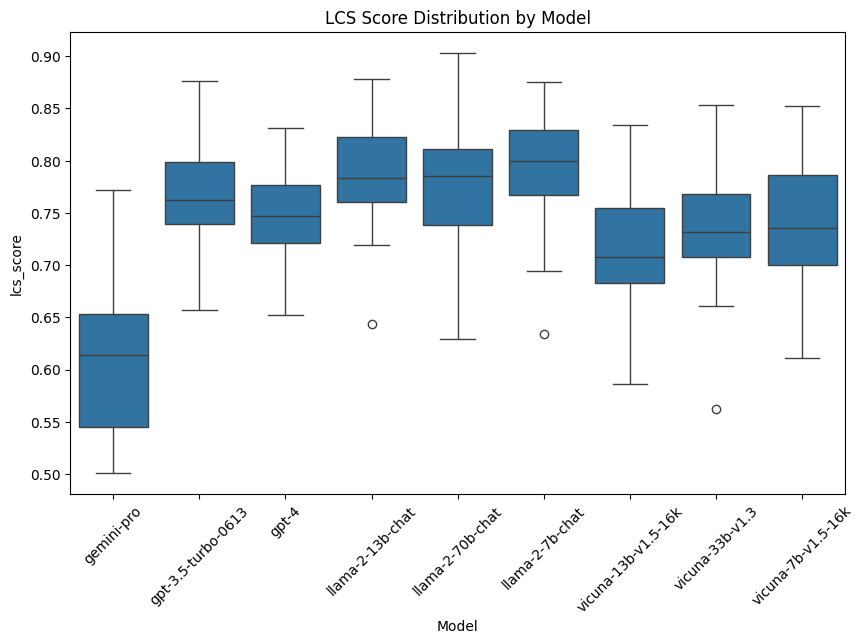

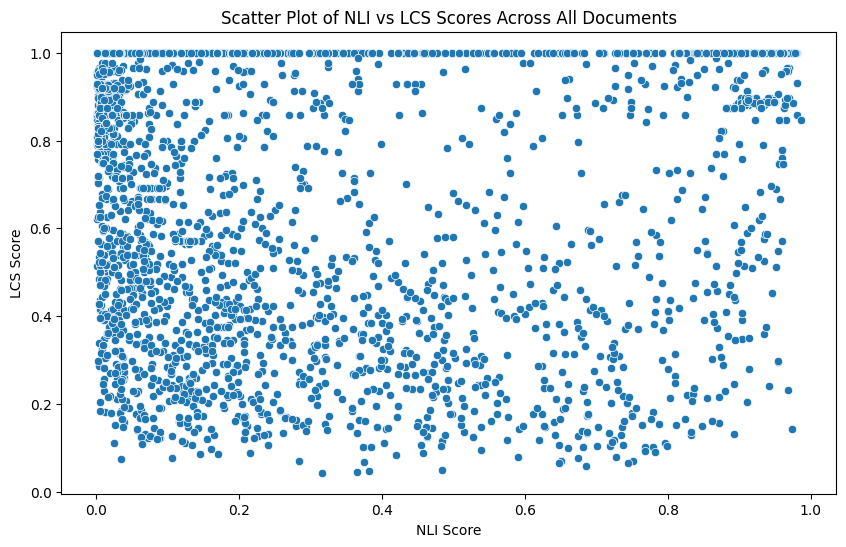

           nli_score  lcs_score
nli_score    1.00000    0.12584
lcs_score    0.12584    1.00000


In [3]:
def plot_line_charts(df: pd.DataFrame):
    # Group by Model and Document
    model_document_performance = (
        df.groupby(["Model", "Document"])[["nli_score", "lcs_score"]]
        .mean()
        .reset_index()
    )

    # Line Charts for each model
    for model in model_document_performance["Model"].unique():
        model_data = model_document_performance[
            model_document_performance["Model"] == model
        ]
        plt.figure(figsize=(10, 4))
        plt.plot(
            model_data["Document"].index, model_data["nli_score"], label="NLI Score"
        )
        plt.plot(
            model_data["Document"].index, model_data["lcs_score"], label="LCS Score"
        )
        plt.title(f"Performance of {model} Across Documents")
        plt.xlabel("Document Index")
        plt.ylabel("Score")
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()


def plot_box_plots(df: pd.DataFrame):
    # Group by Model and Document
    model_document_performance = (
        df.groupby(["Model", "Document"])[["nli_score", "lcs_score"]]
        .mean()
        .reset_index()
    )
    # Box Plots for each model
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Model", y="nli_score", data=model_document_performance)
    plt.title("NLI Score Distribution by Model")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Model", y="lcs_score", data=model_document_performance)
    plt.title("LCS Score Distribution by Model")
    plt.xticks(rotation=45)
    plt.show()
    
    # # Group by Model and Document
    # question_document_performance = (
    #     df.groupby(["Question", "Document"])[["nli_score", "lcs_score"]]
    #     .mean()
    #     .reset_index()
    # )
    # # Box Plots for each question
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x="Question", y="nli_score", data=question_document_performance)
    # plt.title("NLI Score Distribution by Question")
    # plt.xticks(rotation=45)
    # plt.show()

    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x="Question", y="lcs_score", data=question_document_performance)
    # plt.title("LCS Score Distribution by Question")
    # plt.xticks(rotation=45)
    # plt.show()


def plot_scatter_plots(df: pd.DataFrame):
    # # Scatter plot for each model's NLI vs LCS scores
    # plt.figure(figsize=(10, 6))
    # for model in df["Model"].unique():
    #     model_df = df[df["Model"] == model]
    #     plt.scatter(model_df["nli_score"], model_df["lcs_score"], label=model)
    # plt.title("Scatter Plot of NLI vs LCS Scores")
    # plt.xlabel("NLI Score")
    # plt.ylabel("LCS Score")
    # plt.legend()
    # plt.show()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="nli_score", y="lcs_score")
    plt.title("Scatter Plot of NLI vs LCS Scores Across All Documents")
    plt.xlabel("NLI Score")
    plt.ylabel("LCS Score")
    plt.show()

    # Calculate the correlation coefficient between NLI and LCS scores
    correlation_matrix = df[["nli_score", "lcs_score"]].corr()
    print(correlation_matrix)


def plot_bar_graphs(df: pd.DataFrame):
    # Calculate the nli_score and lcs_score averages for each model
    avg_by_model = df.groupby("Model")[["nli_score", "lcs_score"]].mean()

    # Plotting the average scores by Model
    avg_by_model.plot(kind="bar", figsize=(10, 6))
    plt.title("Average NLI and LCS Scores by Model")
    plt.xlabel("Model")
    plt.ylabel("Scores")
    plt.xticks(rotation=45)
    plt.legend(title="Score Type")
    plt.tight_layout()
    plt.show()

    # Calculate the nli_score and lcs_score averages for each question
    avg_by_question = df.groupby("Question")[["nli_score", "lcs_score"]].mean()

    # Plotting the average scores by Question
    avg_by_question.plot(kind="bar", figsize=(10, 6))
    plt.title("Average NLI and LCS Scores by Question")
    plt.xlabel("Question Type")
    plt.ylabel("Scores")
    plt.xticks(rotation=45)
    plt.legend(title="Score Type")
    plt.tight_layout()
    plt.show()


plot_bar_graphs(df)
plot_line_charts(df)
plot_box_plots(df)
plot_scatter_plots(df)

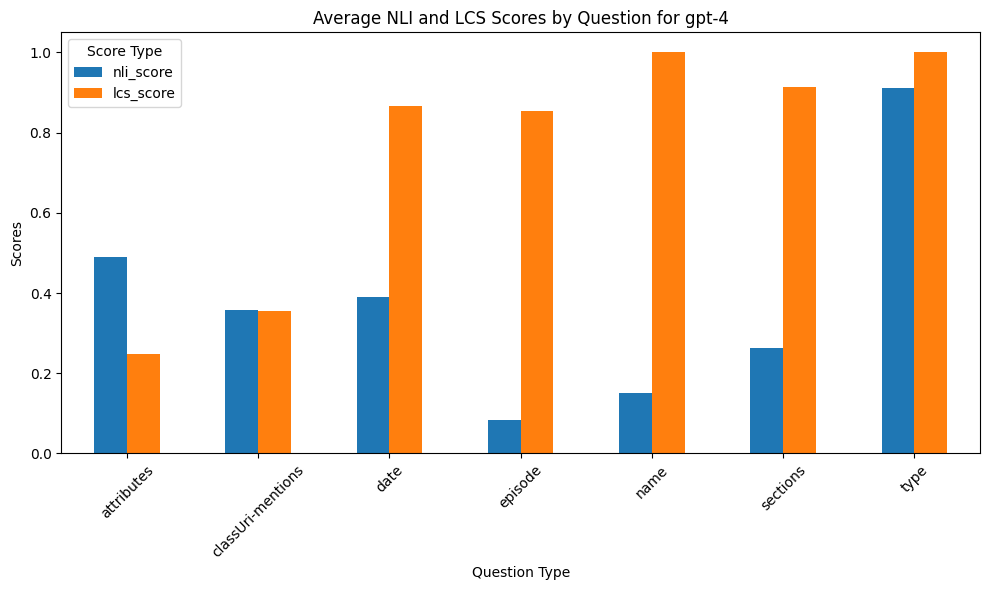

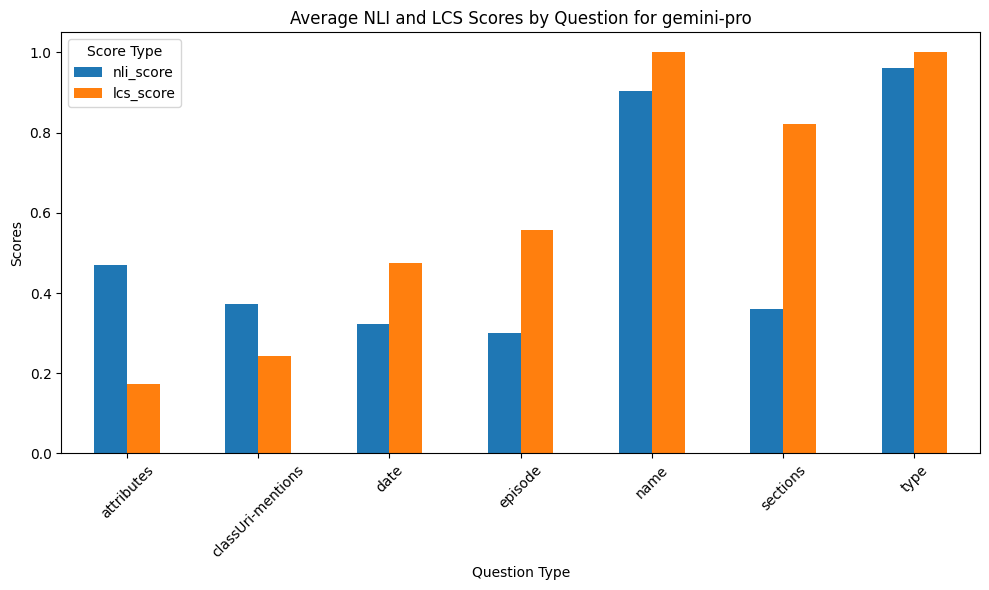

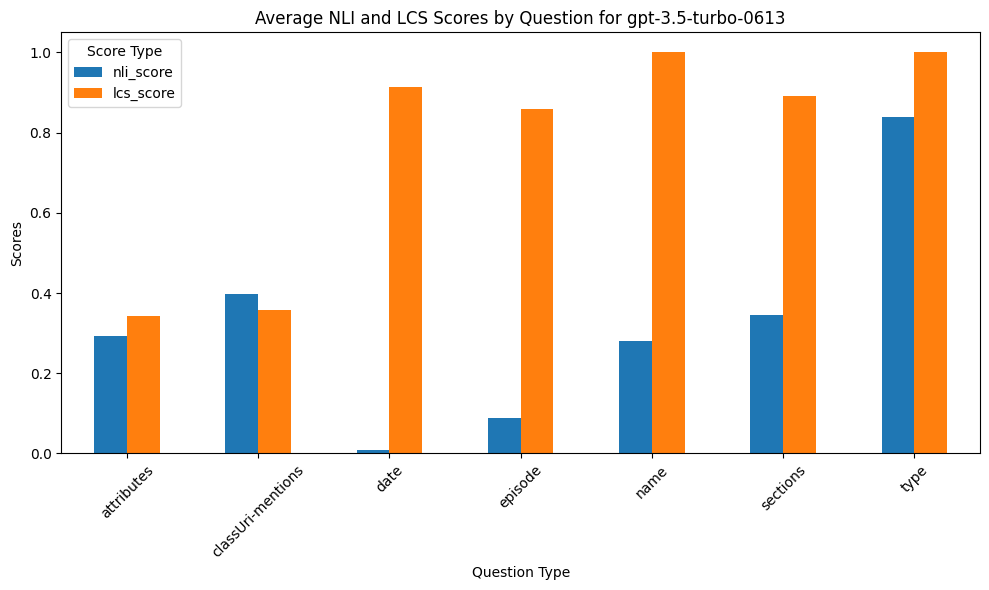

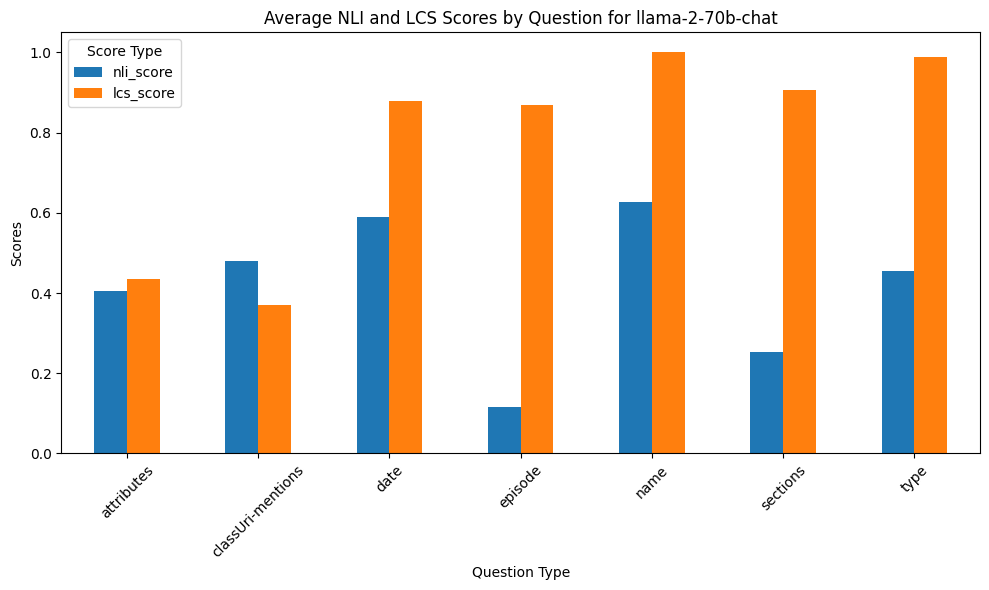

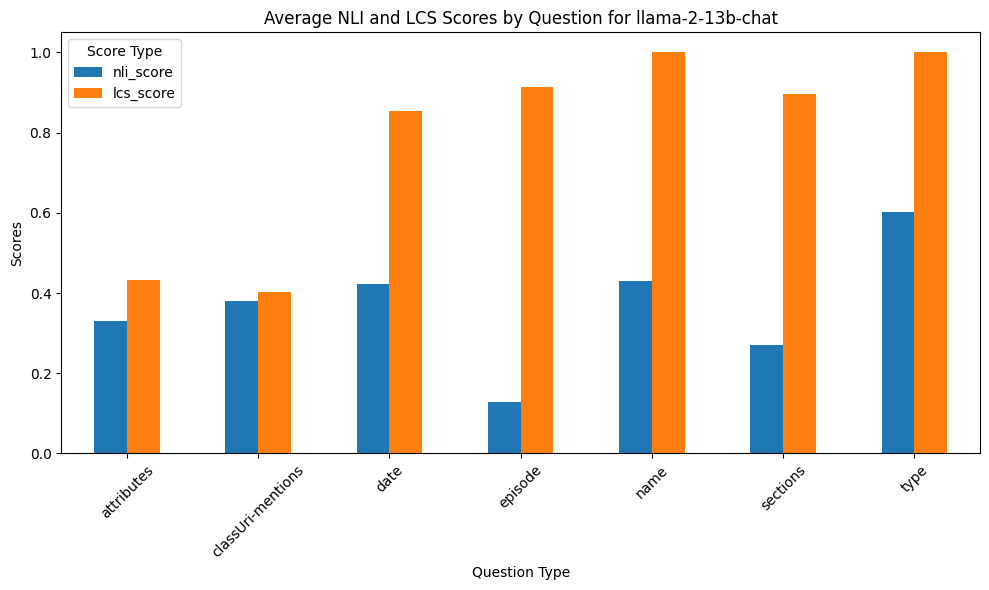

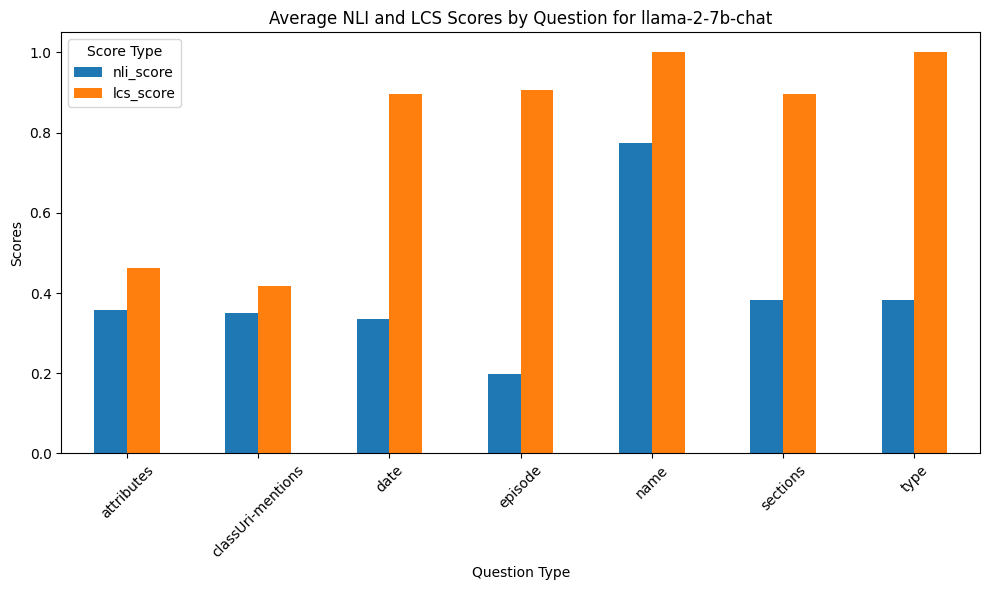

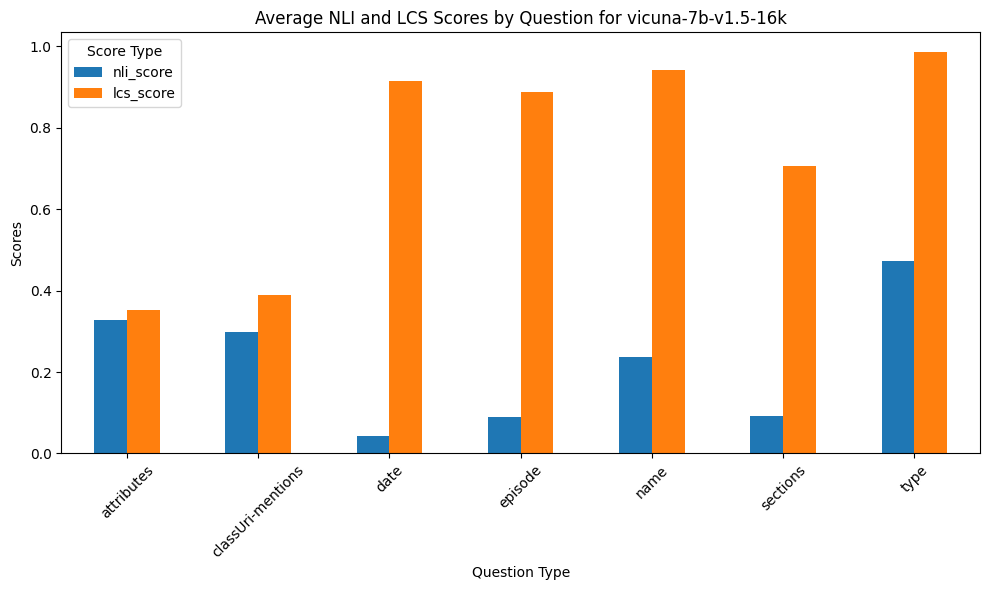

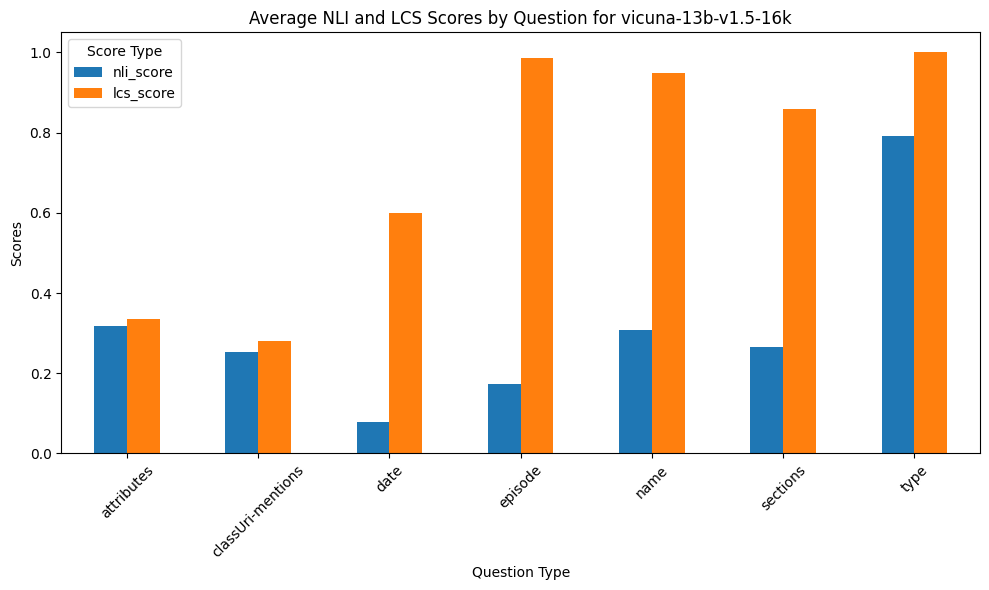

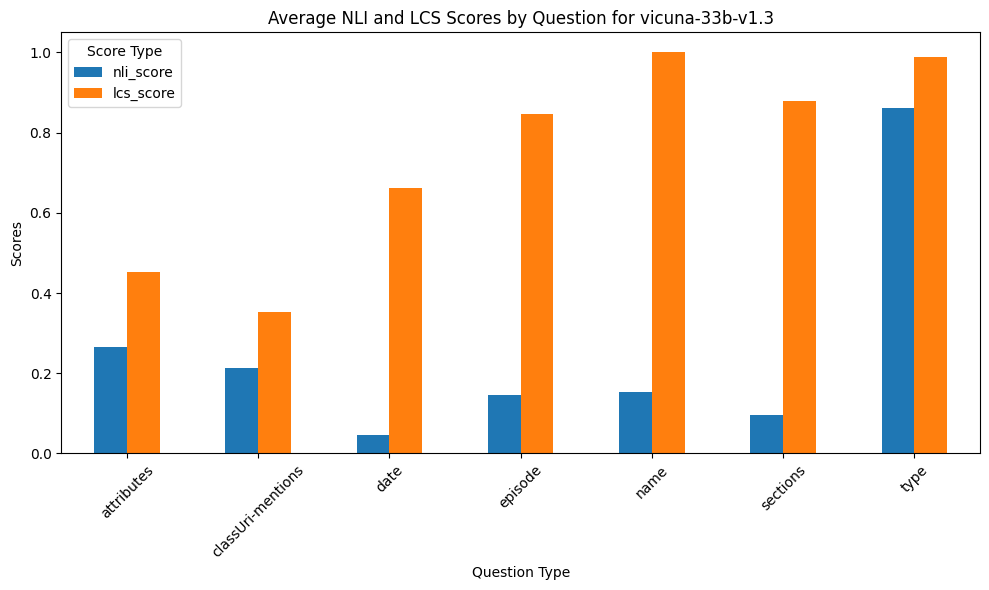

In [12]:

# model_list = ["gpt-4", "gpt-3.5-turbo-0613", "llama-2-7b-chat", "llama-2-70b-chat"]
model_list = df["Model"].unique()
for model in model_list:
    # Calculate the nli_score and lcs_score averages for each question of the model
    model_df = df[df["Model"] == model]
    avg_by_question = model_df.groupby("Question")[["nli_score", "lcs_score"]].mean()
    # Plotting the average scores by Question
    avg_by_question.plot(kind="bar", figsize=(10, 6))
    plt.title("Average NLI and LCS Scores by Question for " + model)
    plt.xlabel("Question Type")
    plt.ylabel("Scores")
    plt.xticks(rotation=45)
    plt.legend(title="Score Type")
    plt.tight_layout()
    plt.show()
